In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from xgboost import XGBClassifier


In [93]:
data = pd.read_csv("dataset.csv")

In [94]:
data.head()

,Unnamed: 0,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,...,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,...,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,...,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,...,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,...,75.56,1,3,1,2,0,1,1,0,0


In [95]:
data.isnull().sum()

Unnamed: 0      0
ID              0
AGE             0
PackHistory     0
COPDSEVERITY    0
MWT1            2
MWT2            1
MWT1Best        1
FEV1            0
FEV1PRED        0
FVC             0
FVCPRED         0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [96]:
data = data[["FEV1PRED", "FEV1", "FVCPRED", "FVC", "MWT2", "MWT1", "AGE", "MWT1Best", "PackHistory", "SGRQ", "CAT", "HAD", "AGEquartiles", "smoking", "copd"]]

In [97]:
data = data.dropna()

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 99
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FEV1PRED      99 non-null     float64
 1   FEV1          99 non-null     float64
 2   FVCPRED       99 non-null     int64  
 3   FVC           99 non-null     float64
 4   MWT2          99 non-null     float64
 5   MWT1          99 non-null     float64
 6   AGE           99 non-null     int64  
 7   MWT1Best      99 non-null     float64
 8   PackHistory   99 non-null     float64
 9   SGRQ          99 non-null     float64
 10  CAT           99 non-null     int64  
 11  HAD           99 non-null     float64
 12  AGEquartiles  99 non-null     int64  
 13  smoking       99 non-null     int64  
 14  copd          99 non-null     int64  
dtypes: float64(9), int64(6)
memory usage: 12.4 KB


In [99]:
X = data.drop(["copd"], axis = 1)
y = data["copd"]


In [100]:
##splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [101]:
X_train.head()

,FEV1PRED,FEV1,FVCPRED,FVC,MWT2,MWT1,AGE,MWT1Best,PackHistory,SGRQ,CAT,HAD,AGEquartiles,smoking
95,61.0,1.61,91,3.14,563.0,558.0,72,558.0,30.0,34.64,18,12.0,3,2
30,42.0,1.66,63,3.08,368.0,360.0,44,368.0,30.0,72.24,30,17.0,1,2
28,68.0,1.92,69,2.66,338.0,322.0,77,338.0,75.0,36.39,16,2.0,4,2
90,80.0,2.80,95,4.39,525.0,510.0,72,525.0,30.0,42.88,23,9.0,3,2
5,50.0,1.09,60,1.99,180.0,216.0,67,216.0,26.0,73.82,29,21.0,2,1


In [102]:
##feature scaling
cols = X_train.columns

In [103]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [104]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         6
           2       0.79      1.00      0.88        11
           3       0.82      1.00      0.90         9
           4       1.00      0.50      0.67         4

    accuracy                           0.83        30
   macro avg       0.90      0.75      0.78        30
weighted avg       0.87      0.83      0.81        30



In [106]:
data = pd.read_csv("dataset.csv")

In [107]:
data = data[["FEV1", "FEV1PRED", "FVC", "smoking", "Diabetes", "hypertension", "copd"]]

In [112]:
data = pd.read_csv("dataset.csv")

data = data[["FEV1", "FEV1PRED", "FVC", "smoking", "Diabetes", "hypertension", "copd"]]

data = data.dropna()
X = data.drop(["copd"], axis = 1)
y = data["copd"]

##splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

##feature scaling
cols = X_train.columns

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      0.50      0.67         8
           2       0.69      1.00      0.82         9
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         3

    accuracy                           0.87        31
   macro avg       0.92      0.88      0.87        31
weighted avg       0.91      0.87      0.86        31



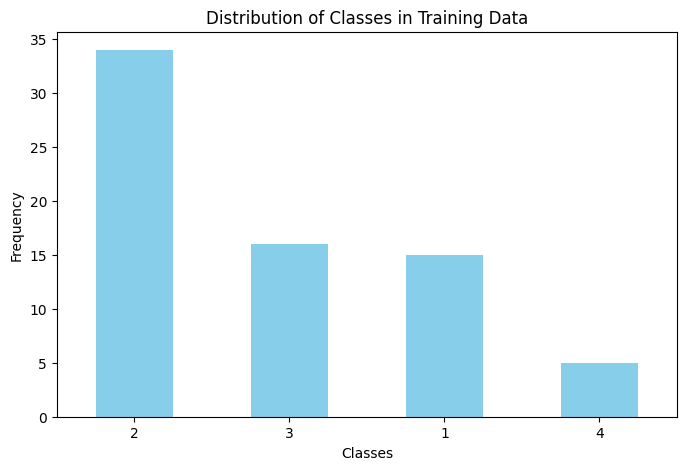

In [114]:
# Plotting the distribution of classes in the training data
plt.figure(figsize=(8, 5))
y_train.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Classes in Training Data')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [116]:
y_train.value_counts()

copd
2    34
3    16
1    15
4     5
Name: count, dtype: int64

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Load the dataset
data = pd.read_csv("dataset.csv")

# Select specific columns
data = data[["FEV1", "FEV1PRED", "FVC", "smoking", "Diabetes", "hypertension", "copd"]]

# Drop rows with missing values
data = data.dropna()

# Split data into features and target
X = data.drop(["copd"], axis=1)
y = data["copd"]

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize SMOTE for oversampling
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = RobustScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

# Convert back to DataFrame
X_train_resampled = pd.DataFrame(X_train_resampled, columns=X.columns)

# Initialize and fit the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = rfc.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 5, n_neighbors = 6

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, recall_score

# Load the dataset
data = pd.read_csv("dataset.csv")

# Select specific columns
data = data[["FEV1", "FEV1PRED", "FVC", "smoking", "Diabetes", "hypertension", "copd"]]

# Drop rows with missing values
data = data.dropna()

# Split data into features and target
X = data.drop(["copd"], axis=1)
y = data["copd"]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Feature scaling
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the XGBoost classifier
xg = XGBClassifier(n_estimators=350)

# Fit the model
xg.fit(X_train, y_train)

# Make predictions
xg_preds = xg.predict(X_test)

# Print classification report
print(classification_report(y_test, xg_preds))


              precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.69      1.00      0.82         9
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         3

    accuracy                           0.87        31
   macro avg       0.92      0.88      0.87        31
weighted avg       0.91      0.87      0.86        31

